
###### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).



In [1]:
import numpy as np
def roulette():
    return np.random.randint(37)


###### 2. 
 - Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
 

Не понятно задание. Формула выглядит так.   
$P_i = \frac{1}{37}$   
$\sum\limits_{i=0}^{36}{P_i} = 1$   
Запустим шарик рулетки 1000000. И посчитаем вероятнось выпадение каждого числа. После чего сложим. Должно получиться ~ 1

In [2]:
d = { i:0 for i in range(37)}
for _ in range(1000000):
    d[roulette()] += 1
lst = [float(d[i]) / 1000000 for i in range(37)]
sum(lst)

0.9999999999999999

- Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [3]:
import matplotlib.pyplot as plt

lst = []
for _ in range(10):
    tmp = [np.random.randn() for _ in range(10)]
    lst.append(sum(tmp))
plt.hist(lst)

(array([2., 1., 2., 1., 3., 0., 0., 0., 0., 1.]),
 array([-1.29299941,  0.03461548,  1.36223038,  2.68984528,  4.01746017,
         5.34507507,  6.67268997,  8.00030486,  9.32791976, 10.65553465,
        11.98314955]),
 <a list of 10 Patch objects>)

###### 3.
 - Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.   


In [4]:

k,n = 0,10000
a = np.random.randint(0,2,n)
b = np.random.randint(0,2,n)
c = np.random.randint(0,2,n)
d = np.random.randint(0,2,n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k += 1
dist = np.random.binomial(n, 0.5)
print(k/n,dist/n)


0.3842 0.5017


 - Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [5]:
n = 1_000_000
d = np.random.binomial(n, 0.125)
print(d/n)

0.124986


###### 4.    
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [6]:
import itertools as its

for p in its.product("01", repeat=3):
    print(''.join(p))

000
001
010
011
100
101
110
111


In [7]:
for p in its.permutations("01234", 2):
    print(''.join(str(x) for x in p))

01
02
03
04
10
12
13
14
20
21
23
24
30
31
32
34
40
41
42
43


In [8]:
for p in its.combinations("012345", 5):
    print(''.join(str(x) for x in p))

01234
01235
01245
01345
02345
12345


###### 5.
Дополните код расчетом коэффициента корреляции x и y по формуле   
$R = \frac{\sum(x_i - x_m) \cdot (y_i - y_m)}{\sqrt{\sum(x_i - x_m)^2 \cdot \sum(y_i - y_m)^2}}$

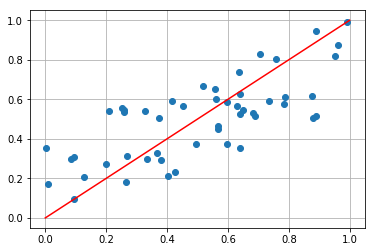

R = 0.74007262


In [32]:
n = 50
x = np.random.rand(n)
y = 0.5 * x + 0.5 * np.random.rand(n)

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x**2))
b = (np.sum(y) - a * np.sum(x)) / n

plt.grid()
plt.plot(x, y, 'o')
plt.plot([0, 1], [0, 1], c='red')
plt.show()

c = np.corrcoef(x, y)

x_avg = np.average(x)
y_avg = np.average(y)
tmp = np.sum((x - x_avg)**2) * np.sum((y - y_avg)**2)
R =  np.sum((x - x_avg) * (y - y_avg)) / np.sqrt(tmp)
print('R = {}'.format(round(R, 8)))